# Assignment 1
Name: Jaimon Thypramabil Thomas
<br>StudentID : 29566428

### Library Used

In [1]:
library(ggplot2) # used for generating plots

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## Section A. Model Complexity and Model Selection

### Question 2 [Leave-One-Out Cross Validation, 15 Marks]

### I. A special case of K-Fold cross-validation is Leave-One-Out cross- validation where K (i.e., the number of folds/subsets) is equal to the size of the training dataset. In each iteration, one training data point is used as the validation set. Implement a Leave-One-Out cross-validation (CV) function for your KNN regressor:
### cv(train.data, train.label, K, numFold=?)
### which takes the training data and their labels (continuous values), K value, the number of folds, and returns errors for different folds of the training data.

In [2]:
#function used to convert data into data frame
#params 
#data - data to be converted into dataframe
#columnNames - Name of the columns in the dataframe
getAsDataFrame<-function(data,columnNames){
    res<-as.data.frame(data)
    colnames(res) <- columnNames
    return(res)
}

In [3]:
#function used to calculate average of an array
averageCalculator <- function(x) {
    return(round((sum(x)/length(x)),2))
}

# KNN Regressor function returns predicted values based on manhattan distance
knn.regressor <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples using manhattan
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
    predict.label = rep(0,test.len)
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        if(test.len == 1){
            #Extracting the top K value indexes based on sorted distances
            nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
        }
        else{
            #Extracting the top K value indexes based on sorted distances
            nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        }
        ###... and calculate the predicted value according to the average value
        predict.label[i]<- (averageCalculator(train.label[nn]))
    }
    ## return the class labels as output
    return (predict.label)
}

In [4]:
# Cross validation functions 
cv <- function(train.data, train.label, K=3, numfold = 1){
  test.error= 0 #used to store the average test for error current K val
  sections = 0 #Used to store which section being taken as test data in each iteration
  i=1
  train.len = nrow(train.data)
  while(i <=train.len){
    
    #splitting the data by portion before kth fold and after kth fold as train and kth fold as test
    #here train.part.2 is the portion after Kth section
    #train.part.1 is the portion before kth section
    #cv.test.data is the data for kth section
    cv.test.data = getAsDataFrame(train.data[i:(i+numfold-1),],colnames(train.data)) 
    cv.test.label = train.label[i:(i+numfold-1)]
    train.part.2 = getAsDataFrame(train.data[(i+numfold):train.len,],colnames(train.data)) 
    train.label.part.2 = train.label[(i+numfold):train.len]
    if(i==1){
        #Handling case when there is no data before the Kth fold
      cv.train.data = train.part.2
      cv.train.label = train.label.part.2
    } 
    else{
      train.part.1 =getAsDataFrame(train.data[1:i-1,],colnames(train.data))  
      train.label.part.1 = train.label[1:i-1]
      if(i==nrow(train.data)){
        #Handling case when there is no data after the Kth fold
        cv.train.data = train.part.1
        cv.train.label = train.label.part.1
      }
      else{
          #combining both data before and after the kth fold
        cv.train.data = rbind(train.part.1,train.part.2)
        cv.train.label = c(train.label.part.1,train.label.part.2)
      }
    }     
    sections = sections + 1 #Updating the fold that is going to be considering
    i<-i+numfold
    #caluculating the error in the current fold
    cur.error = (sum((knn.regressor(cv.train.data, cv.train.label, cv.test.data, K) - cv.test.label)**2))/length(cv.test.label)
    #adding current error to total error 
    test.error =test.error +  cur.error
  }
  #calculating the average error for the value of K
  test.error = test.error/sections
  return(test.error)
}

### II. Using the training data in Question 1, run your Leave-One-Out CV. Change the value of K=1,..,15 in your KNN regressor, and for each K compute the average of error values you have got for folds. Plot the average of error values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your Jupyter Notebook file for Question 2.

In [5]:
#Reading data from csv
task1_train <- read.csv("Task1A_train.csv")
task1_test <- read.csv("Task1A_test.csv")

### Splitting train and test data and labels

train.data <- as.data.frame(task1_train[1:nrow(task1_train), -2])
colnames(train.data)[1] <-'x1'
train.label <- task1_train[1:nrow(task1_train), 2]
test.data <- as.data.frame(task1_test[1:nrow(task1_test), -2])
colnames(test.data)[1] <-'x1'
test.label <- task1_test[1:nrow(task1_test), 2]

In [6]:
#function used for invoking cross validation for each value of K
#Also returning the average error for each K value after aplying cross validation
error.dataframe.cv <- function(train.data, train.label, K=15, numfold = 1){
    error <- data.frame('K'=1:K, 'average.error'=rep(0,K))
    for (k in 1:K){
        error[k,'average.error'] <- cv(temp.data, temp.label, K=k,numfold)
    }
    return(error)
}

### considering just the training data for doing cross validation

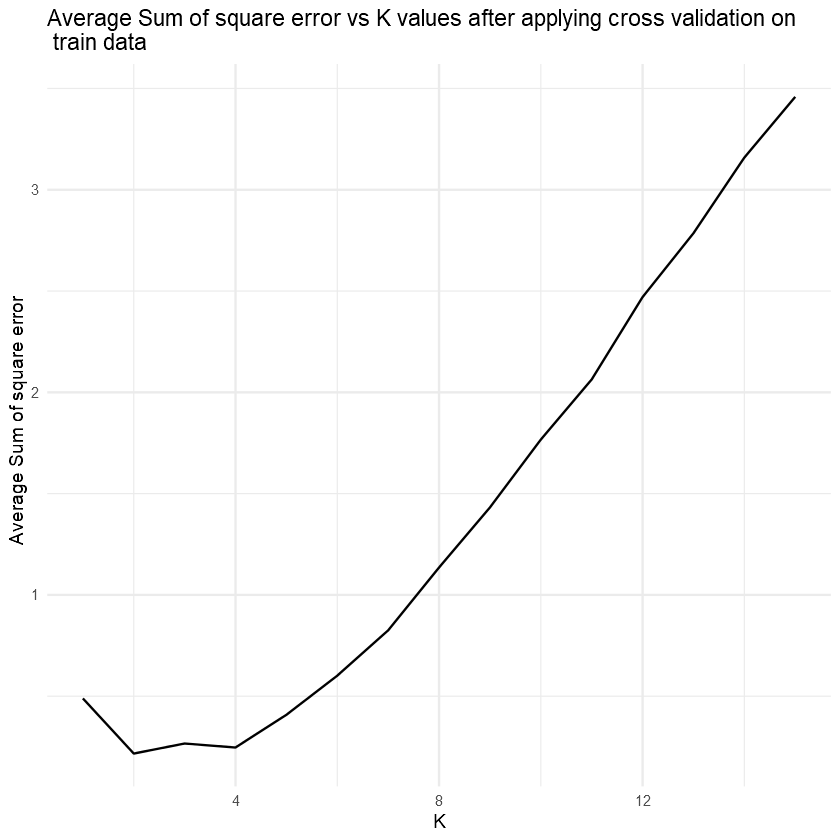

In [18]:
temp.data= train.data
temp.label= train.label
error.training = error.dataframe.cv(temp.data,temp.label)
ggplot(data=error.training, aes(x=K, y=average.error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal()+
      labs( title= "Average Sum of square error vs K values after applying cross validation on \n train data", y=" Average Sum of square error",
           x = "K")

### considering both train and test dataset together for doing cross validation

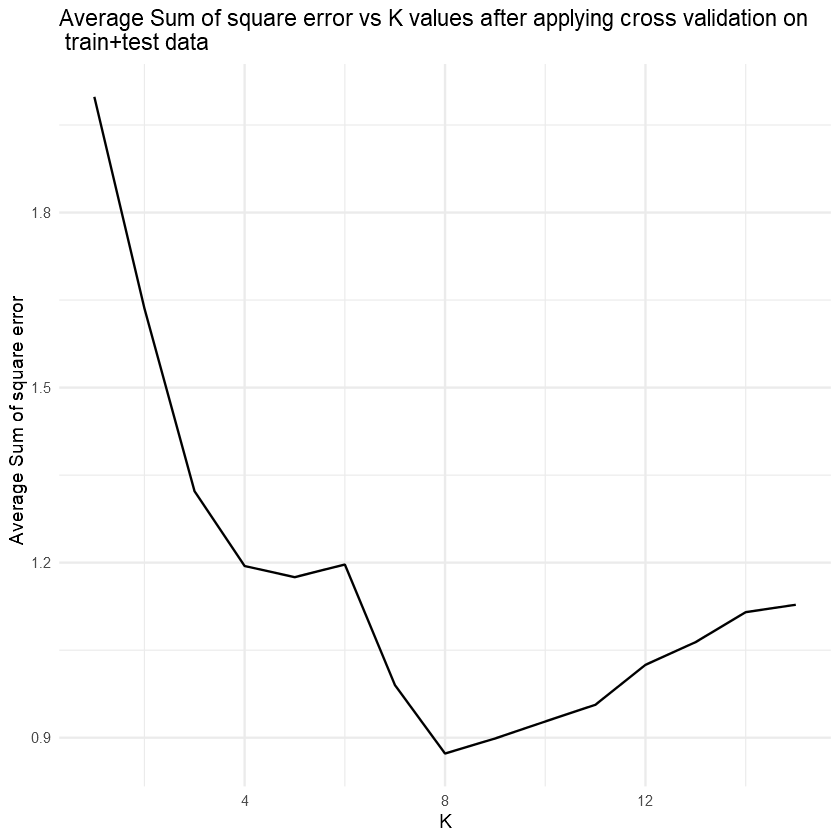

In [19]:
temp.data= rbind(train.data,test.data)
temp.label= c(train.label,test.label)
error.combined = error.dataframe.cv(temp.data,temp.label)
ggplot(data=error.combined, aes(x=K, y=average.error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
labs( title= "Average Sum of square error vs K values after applying cross validation on \n train+test data", y=" Average Sum of square error",
           x = "K")

### III. Report (in your Jupyter Notebook file) the optimum value for K based on your plot for this Leave-One-Out cross validation in the previous part (Part II).

In [9]:
#function used to find the min value
#params
#dataframe - data frame used
#key.column.number - column no which has the Key in the data frame 
#value.column.number - column no which has the value in the data frame 
find.min.key <- function(dataframe, key.column.number = 1,value.column.number = 3){
    minVal = -1 #used to store the min value
    minK = NULL #used to store the Key of the min value
    for(i in 1:nrow(dataframe)) {
        if(minVal == -1){
            #intialising minval and key for the first entry
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
        else if(dataframe[i,value.column.number] < minVal){
            #updating the key and min value when current key has min value compare to previous val
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
    }
    return(minK)
}

In [10]:
minK = find.min.key(error.training, key.column.number = 1,value.column.number = 2)
cat("when we are considering only the training data ")
cat('The optimum value for K in terms of testing error is',minK,'as the testing error is minimum for this value.')

when we are considering only the training data The optimum value for K in terms of testing error is 2 as the testing error is minimum for this value.

In [11]:
minK = find.min.key(error.combined, key.column.number = 1,value.column.number = 2)
cat("when we are considering both the training and test data together ")
cat('The optimum value for K in terms of testing error is',minK,'as the testing error is minimum for this value.')

when we are considering both the training and test data together The optimum value for K in terms of testing error is 8 as the testing error is minimum for this value.